## Actividad

En esta actividad se compararán distintos algoritmos de clustering sobre una base de datos de imágenes. 

### Datos
La base de datos a usar corresponde a una base de datos de imágenes, que podrá encontrar en el Siding como 'places-db.npy'. Las *features* de estas fueron extraídas por medio del modelo de extracción de *features* de imágenes **VGG-16**, cuyo paper pueden encontrar en el siguiente link si desea conocer más detalles: https://arxiv.org/abs/1409.1556. Cabe destacar que su dimensionalidad fue reducida para que pudiesen correrlo en un tiempo razonable durante la actividad.

Los datos para entrenamiento se acceden de la siguiente manera:
```
db = np.load('places-db.npy').item()
X = db['features']
```
Las clases disponibles en estas imágenes son las siguientes:
* 'alley'
* 'castle'
* 'hotel-outdoor'
* 'motel'
* 'pond'
* 'tower'
* 'volcano'

En suma a la base de datos, hay un subconjunto de imágenes de ellas comprimidas en el archivo 'images.rar' para las visualizaciones que se solicitarán posteriormente, disponible en el Siding.

### Pasos

1.-   Descargue y descomprima el archivo 'images.rar'. Cargue y explore la base de datos 'places-db.npy'. ¿Qué tipo de información contiene? ¿Qué tamaño tiene? ¿Qué dificultades puedo tener a la hora de correr los algoritmos?


2.- Utilizando la librería sklearn implemente los algoritmos:
* K-means
* DBSCAN
* Clustering Jerárquico
    

3.- Pruebe distintos hiperparámetros y número de clusters según corresponda. Para cada caso comente: ¿Qué clases caracterizan mayoritariamente los clusters conformados? ¿Qué pasa cuando el número de clusters es inferior al número de clases reales? ¿Qué clases se aglomeran?


4.- Comente respecto al tiempo de ejecución de cada uno de los métodos. 


5.- Compare visualmente los tres algoritmos. 

* Visualize los clusters: Para ello dispone del método 'visualize' en utils, al cual le debe pasar la 'db' completa y las predicciones del método de clusterización en orden. La visualización muestra un subconjunto (no debe preocuparse de elegirlos, lo hace automático) de datos en 2D. El color identifica el cluster al que pertenece. 
* Visualize imágenes de cada cluster: los números representan el 'id' del dato ploteado y el color el cluster al que pertenece. Si desea obtener la imagen original del dato basta llamar 'get_image' con el 'id' (tipo *int*) que visualiza en el plot. Identifique imágenes por cada cluster.


6.- Comente similitudes y diferencias de cada método.





## Librerías

In [104]:
from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.decomposition import PCA

# Clustering libraries
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

## Data

In [16]:
data = np.load('places-db.npy').item()


In [21]:
X = data['features']

## Utils

Funciones para visualizar

In [35]:
# 'pred': predictions of the clustering method in same order as db. Shape: (db['features'].shape[0],) (1-dimensional)
def visualize(db, pred):    
    keep = db['ids'] != -1
    pred = np.array(pred)[keep]
    X = db['features'][keep]
    ids = db['ids'][keep]
    
    cluster_ids = np.unique(pred)
    colors_base = plt.cm.tab20(range(len(cluster_ids)))
    to_color = dict(zip(cluster_ids, colors_base))
    colors = [to_color[l] for l in pred]
    
    pca = PCA(n_components=2)
    X_vis = pca.fit_transform(X)
    
    plt.figure(figsize=(10,10))
    for i, point in enumerate(X_vis):
        id_ = ids[i]
        plt.scatter(point[0], point[1], color=colors[i], marker=r"$ {} $".format(str(id_)), s=200)

# 'id_': numbers of the 'visualize(db, pred)' plot
def get_image(db, id_):
    idx = np.where(db['ids']==id_)[0][0]
    name = db['files'][idx]
    print(name.split('/')[0])
    return Image(filename = './images/'+name, width=200, height=200)

## Clustering Methods

### K-Means

In [57]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)

In [58]:
kmeans.labels_

array([6, 6, 6, ..., 5, 5, 5], dtype=int32)

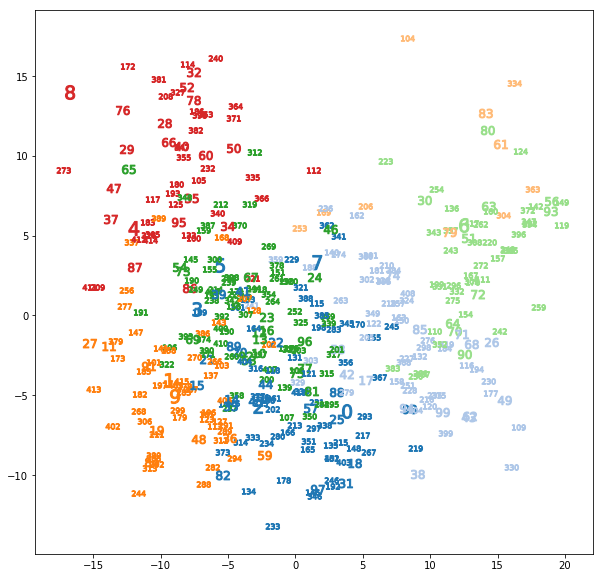

In [59]:
visualize(data, kmeans.labels_)

castle
castle


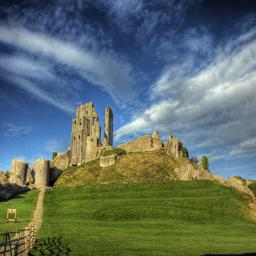

In [103]:
a = get_image(data, 219)
b = get_image(data, 38)
a

### Clustering Jerárquico

In [96]:
clustering = AgglomerativeClustering(7).fit(X)

In [97]:
clustering.labels_

array([3, 3, 3, ..., 0, 1, 1])

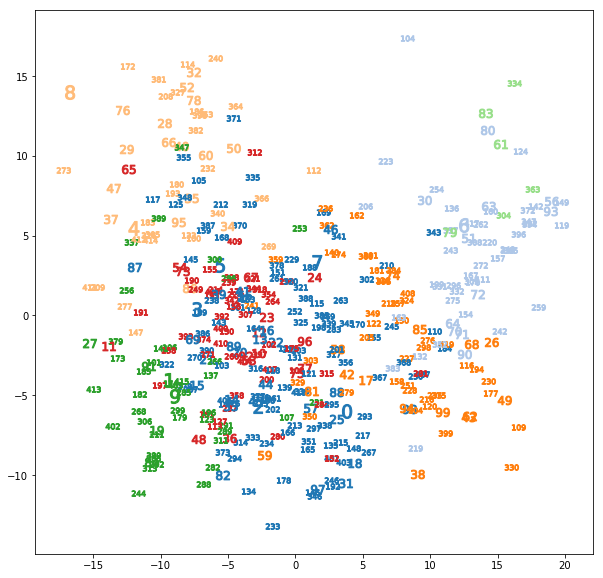

In [98]:
visualize(data, clustering.labels_)

volcano
volcano


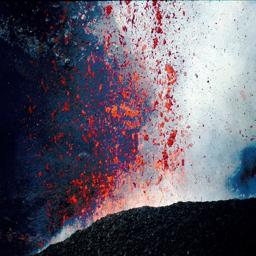

In [101]:
a = get_image(data, 104)
b = get_image(data, 61)
a

### DBScan

In [125]:
clustering2 = DBSCAN(eps=5, min_samples=2).fit(X)

In [126]:
clustering2.labels_

array([-1, -1, -1, ..., -1, -1, -1])

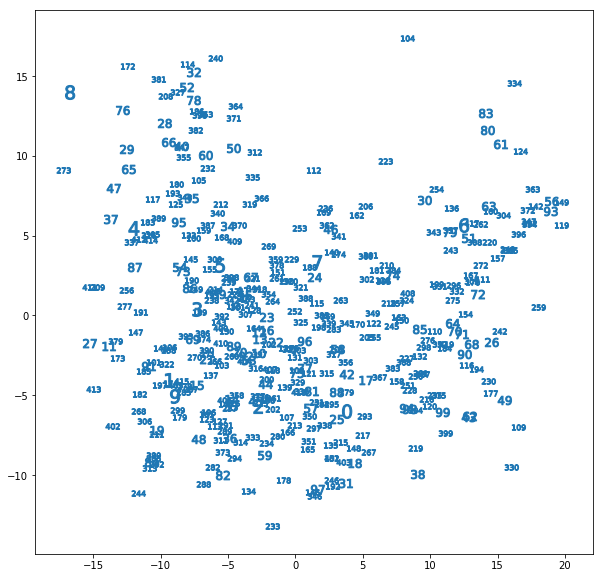

In [127]:
visualize(data, clustering2.labels_)